# Notes

In [1]:
import numpy as np

from lisc.objects.base import Base
from lisc.collect import collect_counts

In [2]:
import seaborn as sns

from lisc.plts.counts import plot_vector, plot_matrix
import matplotlib.pyplot as plt

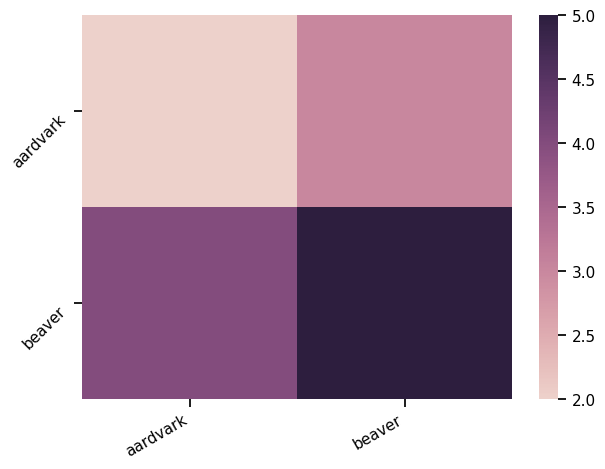

In [4]:
plot_matrix(np.array([[2, 3], [4, 5]]),
            xticklabels=['aardvark', 'beaver'],
            yticklabels=['aardvark', 'beaver'], 
            xtickrotation=30,
            ytickrotation=45,
            )


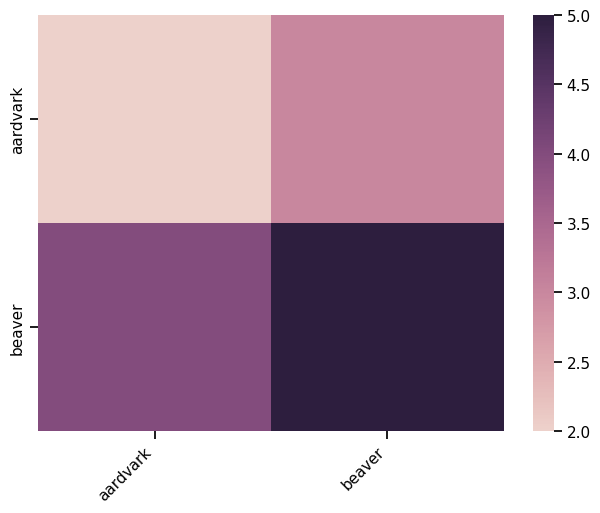

In [57]:
plot_matrix(np.array([[2, 3], [4, 5]]), xticklabels=['aardvark', 'beaver'], yticklabels=['aardvark', 'beaver'])
rotate_ticks(plt.gca(), xtickrotation=45.2)
# rotate_ticks(plt.gca(), 'y', 45)
# #rotate_ticks(plt.gca(), 'y', -45)
# #rotate_ticks(plt.gca(), 'y', 320)

[Text(0.5, 0, '0'), Text(1.5, 0, '1')]

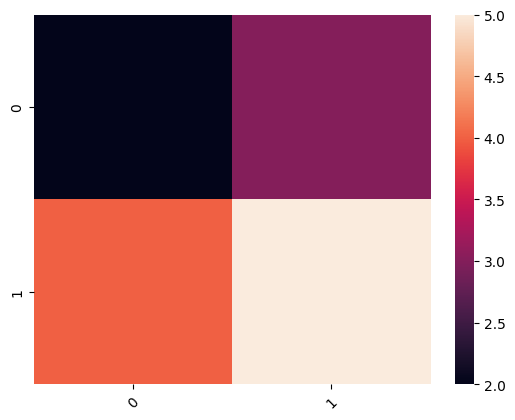

In [13]:
ax = sns.heatmap(np.array([[2, 3], [4, 5]]))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [1]:
from pathlib import Path


import numpy as np

from lisc import Counts, Words
from lisc.io.utils import get_files
from lisc.objects.counts import Counts1D
from lisc import collect_across_time

from lisc.io.db import SCDB

In [5]:
pp = SCDB('lisc_db')
pp.gen_paths()

In [6]:
pp.paths

{'base': PosixPath('lisc_db'),
 'terms': PosixPath('lisc_db/terms'),
 'logs': PosixPath('lisc_db/logs'),
 'data': PosixPath('lisc_db/data'),
 'figures': PosixPath('lisc_db/figures'),
 'counts': PosixPath('lisc_db/data/counts'),
 'words': PosixPath('lisc_db/data/words'),
 'raw': PosixPath('lisc_db/data/words/raw'),
 'summary': PosixPath('lisc_db/data/words/summary')}

In [5]:
years = [1950, 1960, 1970, 1980, 1990, 2000]

years = [1975, 1980, 1985, 1990]

years = [2001, 2002, 2003, 2004, 2005]

In [6]:
for y0, y1 in zip(years, years[1:]):
    print(y0, y1-1)

2001 2001
2002 2002
2003 2003
2004 2004


In [7]:
aa = Counts1D()
aa.add_terms(['brain', 'body'])

In [8]:
bb = Words()
bb.add_terms(['brain', 'body'])

In [9]:
cc = Counts()
cc.add_terms(['brain', 'body'], dim='A')
cc.add_terms(['head', 'nose'], dim='B')

In [10]:
years = [1950, 1955, 1960]

In [11]:
aas = collect_across_time(aa, years)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [12]:
aas[years[0]].counts, aas[years[1]].counts

(array([6094, 4615]), array([8061, 5765]))

In [13]:
aas

{1950: <lisc.objects.counts.Counts1D at 0x7f9767459e50>,
 1955: <lisc.objects.counts.Counts1D at 0x7f976834bbb0>}

In [16]:
save_time_results(aas, 'test_save', 'test_save_file')

In [27]:
aas2 = load_time_results('test_save_file', 'test_save')

In [28]:
aas

{1950: <lisc.objects.counts.Counts1D at 0x7f9767459e50>,
 1955: <lisc.objects.counts.Counts1D at 0x7f976834bbb0>}

In [32]:
aas[1950].counts

array([6094, 4615])

In [31]:
aas2[1950].counts

array([6094, 4615])

In [16]:
ccs = collect_across_time(cc, years)

In [17]:
ccs[years[0]].counts

array([[88,  5],
       [ 5, 11]])

In [18]:
ccs[years[0]].terms['A'].counts

array([6094, 4615])

In [19]:
ccs[years[0]].terms['B'].counts

array([1264,  896])

In [20]:
aas[years[0]].meta_data

{'date': '2023-08-31_23:23:40', 'requester': {'n_requests': 3, 'wait_time': 0.3333333333333333, 'start_time': '23:23:40 Thursday 31 August 2023', 'end_time': '23:23:42 Thursday 31 August 2023', 'logging': None}, 'db_info': {'dbname': 'pubmed', 'menuname': 'PubMed', 'description': 'PubMed bibliographic record', 'dbbuild': 'Build-2023.08.31.18.14', 'count': '36148197', 'lastupdate': '2023/08/31 18:14'}, 'settings': {'db': 'pubmed', 'field': 'TIAB', 'mindate': '1950/01/01', 'maxdate': '1954/12/31'}, 'log': None}

In [21]:
aas[years[1]].meta_data

{'date': '2023-08-31_23:23:42', 'requester': {'n_requests': 3, 'wait_time': 0.3333333333333333, 'start_time': '23:23:42 Thursday 31 August 2023', 'end_time': '23:23:47 Thursday 31 August 2023', 'logging': None}, 'db_info': {'dbname': 'pubmed', 'menuname': 'PubMed', 'description': 'PubMed bibliographic record', 'dbbuild': 'Build-2023.08.31.17.13', 'count': '36148194', 'lastupdate': '2023/08/31 17:13'}, 'settings': {'db': 'pubmed', 'field': 'TIAB', 'mindate': '1955/01/01', 'maxdate': '1959/12/31'}, 'log': None}

In [8]:
aa.run_collection()

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [9]:
from lisc.plts.counts import plot_matrix, plot_vector

In [10]:
aa.counts

array([1201781, 1291730])

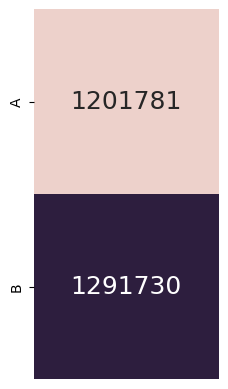

In [11]:
plot_vector(aa.counts, labels=['A', 'B'])

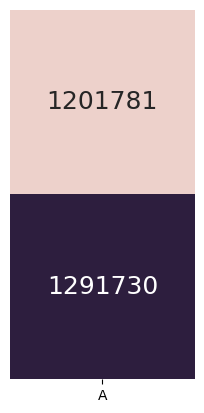

In [12]:
plot_vector(aa, xticklabels=['A'])